In [1]:
#Public
from binance.client import Client
import numpy as np
import pandas as pd
import time 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
from dotenv import load_dotenv


In [2]:
#API Key and Secret Key 
load_dotenv()
api_key = os.getenv('binance_key')
api_secret = os.getenv('binance_secret_key')

#Launching Binance API client
client = Client(api_key, api_secret)
#print("Logged in")


In [3]:
print("How many market checks would you like completed ( per round of testing )")
total_checks = int(input())

print("How much time would you like between each market check ( in seconds please )?")
time_between_checks = int(input())

print("How many rounds of testing would you like to do?")
total_rounds = int(input())

print("I estimate this program will run for ", (total_checks * time_between_checks * total_rounds*2), " seconds.")


How many market checks would you like completed ( per round of testing )
How much time would you like between each market check ( in seconds please )?
How many rounds of testing would you like to do?
I estimate this program will run for  100  seconds.


In [4]:
#Lists
data_symb = [] #Symbols
data_inv = [] #Investments
data_pc = [] #Percentage Change

#Creating a batch variable to keep track of what 'batch' we are on for testing purposes
batch = 0

In [5]:
while (batch < total_rounds):    
    
    #Gets every 24h ticker data point
    tickers = client.get_ticker()

    #cols are the names of the dataframe's columns
    cols = ["Symbol", "Current Price", "Volume", "24hr %Change", "High Price", "Low Price"]

    #creating a dataframe 'df' to store all our numbers
    df_assets = pd.DataFrame(columns = cols)

    #enumerating variable 'en'
    en = 0

    for ticker in tickers:
        df_assets.loc[en] = [ticker['symbol'],float(ticker['askPrice']), float(ticker['volume']),
                            float(ticker['priceChangePercent']), float(ticker['highPrice']), float(ticker['lowPrice'])]
        en = en+1
    
    #Now I want to track the momentum of each trading asset
    #Going to create a Dataframe for that
    df_momentum = pd.DataFrame(data = df_assets['Symbol'], columns = ['Symbol'])


    current_check = 0 #Enumeration variable
    momentum_values_list = [] #list to keep track of momentum values

    #Creating a loop to mimic time and collect data as time passes
    while(current_check < total_checks):

        tickers = client.get_ticker() #Gets current ticker information
        temp = [] #List to keep track of momentum values for the current iteration market check

        for ticker in tickers:
            temp.append(float(ticker['askPrice']))


        momentum_values_list.append(temp) #Appending temp to our momentum_values_list    
        current_check = current_check + 1 #Enumerating current_check to eventually meet total_checks value
        time.sleep(time_between_checks) #Resting for designated time

    print("Initial Market Check for Batch #",batch," is complete.")


    #Now I want to add our market data gathered from 'momentum_values_list' to our momentum dataframe 'df_momentum'
    for i in range(total_checks):
        df_momentum.insert(i+1,i+1,momentum_values_list[i])

    #Setting up DataFrames
    perc_change = ((df_momentum[total_checks] - df_momentum[1])/df_momentum[1])
    df_momentum.insert(df_momentum.shape[1], "Percentage Change", perc_change)
    df_pos_momentum = df_momentum[df_momentum['Percentage Change'] > 0]
    
    #Filtering Dataframe
    strat_df = df_pos_momentum[df_pos_momentum['Percentage Change'] >= df_pos_momentum['Percentage Change'].quantile(.98)]
    
    #Calculating Individual Investments
    total_investment = 10000
    strat_df_invs = ((strat_df['Percentage Change']/strat_df['Percentage Change'].sum())*total_investment)
    
    #Appending Investments to Dataframe
    strat_df.insert(strat_df.shape[1], "Investments", strat_df_invs)
    
    # Send investment suggestions to your mobile number.
    
        
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
    #HERE IS WHERE YOU WOULD ACTUALLY PURCHASE USING BINANCE API
  
    
    #Gathering Restult Data for Evaluation
    print("Now Sleeping for Designated Time")
    time.sleep(total_checks * time_between_checks) #resting for the passage of time and assets to appreciate in value

    symbols_strat_df = strat_df['Symbol'].values #list of symbols in the positive momentum dataframe
    new_prices = [None] * len(symbols_strat_df) #List for prices of post-trade (for evaluation purposes)

    tickers = client.get_ticker() #gets most up to date info
    i = 0 #Enumeration variable

    for ticker in tickers:
     
        if (i == len(symbols_strat_df)):
            break
        if ((ticker['symbol'] == symbols_strat_df[i])):
            new_prices[i] = float(ticker['askPrice'])
            i = i + 1
            
    #Appending Result Data to DataFrame
    strat_df.insert(strat_df.shape[1], "Updated Prices", new_prices)
    
    #Calculating % Change in Value
    strat_df_civ = (strat_df['Updated Prices'] - strat_df[total_checks])/strat_df[total_checks]
    
    #Appending Change in Investment Value to Dataframe
    strat_df.insert(strat_df.shape[1], "Change in Investment Value", strat_df_civ)
    
    #Storing our results
    data_symb.append(strat_df['Symbol'])
    data_inv.append(strat_df['Investments'])
    data_pc.append(strat_df['Change in Investment Value'])

    #Getting current time for documentation purposes
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")

    print("Batch #", batch, "is complete. It is currently ", current_time,".\n")

    batch = batch + 1 #Enumerating batch variable
    

Initial Market Check for Batch # 0  is complete.
Now Sleeping for Designated Time
Batch # 0 is complete. It is currently  16:07:47 .

Initial Market Check for Batch # 1  is complete.
Now Sleeping for Designated Time
Batch # 1 is complete. It is currently  16:08:11 .

Initial Market Check for Batch # 2  is complete.
Now Sleeping for Designated Time
Batch # 2 is complete. It is currently  16:08:35 .

Initial Market Check for Batch # 3  is complete.
Now Sleeping for Designated Time
Batch # 3 is complete. It is currently  16:08:59 .

Initial Market Check for Batch # 4  is complete.
Now Sleeping for Designated Time
Batch # 4 is complete. It is currently  16:09:22 .



Your investment suggestion is the following:  145       QSPBTC
360       KEYETH
557      DOGEBTC
1759    PORTOEUR
Name: Symbol, dtype: object 145     1.99
360     0.38
557     0.33
1759    0.84
Name: Percentage Change (%), dtype: float64
Your investment suggestion is the following:  145       QSPBTC
360       KEYETH
557      DOGEBTC
1759    PORTOEUR
Name: Symbol, dtype: object 145     1.99
360     0.38
557     0.33
1759    0.84
Name: Percentage Change (%), dtype: float64


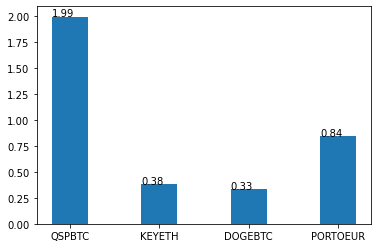

In [16]:

#Obtaining final investments strategies from the strat_df

final_investments = strat_df.loc[:, ['Symbol', 'Percentage Change']]
final_investments['Percentage Change'] = round(final_investments['Percentage Change']* 100, 2)
final_investments = final_investments.rename(columns={'Percentage Change' : 'Percentage Change (%)'})

#Display Suggestions
print(f"Your investment suggestion is the following: ", final_investments['Symbol'], final_investments['Percentage Change (%)'] )
#whatsapp_notification = print(f"Your investment suggestion is the following: ", final_investments['Symbol'], final_investments['Percentage Change (%)'] )

#plot values
x = final_investments['Symbol']
y = final_investments['Percentage Change (%)']

# assign your bars to a variable so their attributes can be accessed
bars = plt.bar(x=x, height=y, width=.4)

# access the bar attributes to place the text in the appropriate location
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(),  yval + .005, yval)

In [23]:
#Twilio notification setup
from twilio.rest import Client 
twilio_sid = os.getenv('twilio_sid')
twilio_auth_token = os.getenv('twilio_auth_token')
client_twilio = Client(twilio_sid, twilio_auth_token) 

final_investments_max = max(final_investments['Percentage Change (%)'])
momentum_threshold = 5

if final_investments_max >= momentum_threshold:
    print(f"There are cryptocurrencies surging over {momentum_threshold}%!")

    message = client_twilio.messages.create( 
                                  from_='whatsapp:+14155238886',  
                                  body= 'Cryptomarkets are surging over your designated threshold!',      
                                  to='whatsapp:+11111111111' 
                              ) 

    print(message.sid)
elif final_investments_max < momentum_threshold:
    print(f"There are no cryptocurrencies surging over {momentum_threshold}%.")

    message = client_twilio.messages.create( 
                                  from_='whatsapp:+14155238886',  
                                  body= 'There are no cryptocurrencies surging over your designated threshold',      
                                  to='whatsapp:+11111111111' 
                              ) 


There are no cryptocurrencies surging over 5%.
